In [3]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("../input/train.csv")
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


Binary distribution and the target distribution is skewed, we need a AUC metric


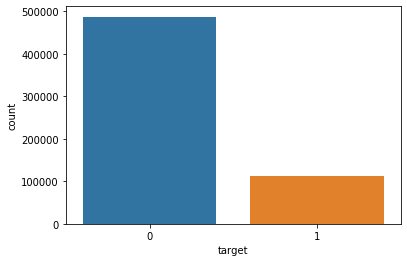

In [19]:
sns.countplot(x='target', data=df)
print("Binary distribution and the target distribution is skewed, we need a AUC metric")

## Exploring our dataframe

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null int64
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(2), object(17)
memory usage: 114.4

### QUick viz of the columns

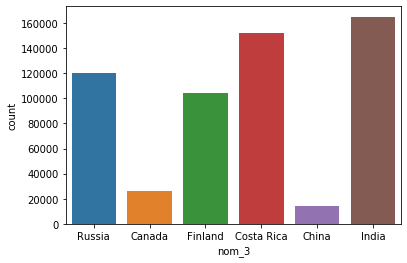

In [45]:
sns.countplot(x='nom_3', data=df)

### Checking for NaNs
We have around 3% NaNs in each column but id and target

In [46]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count

for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%')  

id: 0.0%
bin_0: 2.9823333333333335%
bin_1: 3.0005%
bin_2: 2.9883333333333333%
bin_3: 3.0023333333333335%
bin_4: 3.007833333333333%
nom_0: 3.042%
nom_1: 3.026%
nom_2: 3.0058333333333334%
nom_3: 3.020166666666667%
nom_4: 3.0058333333333334%
nom_5: 2.963%
nom_6: 3.0218333333333334%
nom_7: 3.0005%
nom_8: 2.9591666666666665%
nom_9: 3.012166666666667%
ord_0: 3.048%
ord_1: 3.0068333333333332%
ord_2: 3.0125%
ord_3: 2.986%
ord_4: 2.9883333333333333%
ord_5: 2.952166666666667%
day: 2.992%
month: 2.998%
target: 0.0%


## Take home messages
- We have NaNs values that we will need to take care of
- We have nominal and ordinal values that need to be one hot encoded
- It's a binary classification, we can use logistic regression